An Implementation of Game of Life in Python
===============================================================================
Rules:
- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

Import Python File

In [1]:
from src.life.life import Life

To Import The Description of the Python File

In [2]:
help(Life)

Help on class Life in module life:

class Life(builtins.object)
 |  Life(filename: str)
 |
 |  A Python implementation of Game of Life.
 |
 |  As part of Big Geodata Processing course.
 |
 |  Rules:
 |  - Any live cell with fewer than two live neighbours dies, as if by underpopulation.
 |  - Any live cell with two or three live neighbours lives on to the next generation.
 |  - Any live cell with more than three live neighbours dies, as if by overpopulation.
 |  - Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.
 |
 |  Methods defined here:
 |
 |  __init__(self, filename: str)
 |      Creates a game of life object.
 |
 |      Args:
 |        filename: Input file name.
 |
 |  display_grid(self)
 |      Displays the current state of the grid with live and dead cells.
 |
 |  tick(self)
 |      Applies the rules of Game of Life for one generation.
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors de

Define the Filename

In [3]:
filename = "input_5x5.txt"
#filename = "data/1000x1000_0.1.txt"
#filename = "data/10000x10000_0.1.txt"

The Initialization of the grid

In [4]:
life = Life(filename)
life.display_grid()


 Current grid:
00000
00100
00010
01110
00000


Only Run for 1 time

In [5]:
life.tick()
life.display_grid()


 Current grid:
00000
00000
01010
00110
00100


Running for Number of Generations

In [6]:
num_generations = 4

for _ in range(num_generations):
    life.tick() 

In [7]:
life.display_grid()  


 Current grid:
00000
00000
00000
00101
00011


Save to file Output.txt

In [9]:
def save_to_file(self, output_filename):
    """Saves the current state of the grid to a text file, ensuring valid coordinates."""
    with open(output_filename, 'w') as f:
        # Write the grid size on the first line
        f.write(f"{self.grid_size} {self.grid_size}\n")
        # Write the live cell coordinates, ensuring they are within valid bounds
        for row, col in sorted(self.live_cells):
            if 0 <= row < self.grid_size and 0 <= col < self.grid_size:
                f.write(f"{row} {col}\n")

# Now we update the Life class to include the save_to_file method
Life.save_to_file = save_to_file

# Example of how to use it in your notebook
output_filename = "output_life.txt"  # Adjust the path to save the file appropriately in the notebook
life.save_to_file(output_filename)
print(f"Final grid saved to {output_filename}")

Final grid saved to output_life.txt


## CPU AND THE WALL TIME

CPU time is the time that is spent by the CPU to process a program's instruction, while Wall time is the actual time that is needed to complete the execution. We run both the code for the 1000 x 1000 and 10000 x 10000 grids to see how the size grid affects the CPU time and wall time.


The table below shows the CPU and Wall time for both grids.


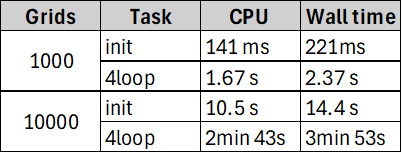

This simulation reveals a clear relationship between the size of the grid and the overall computational performance. As the number of cells in the grid increases, the CPU and wall time experience a corresponding rise. This direct correlation indicates that larger grid sizes impose a heavier computational burden on the system. Each simulation tick involves checking and updating the state of individual cells based on the Game of Life rules. As the grid expands, the number of cells that need to be processed grows quadratically (since the grid area increases as the square of its dimensions), thus intensifying the workload.

## Line Profiler

In this section, we analyze each individual lines within specific functions using Line Profiling. The goal of employing the Line Profiling technique and comparing function profiles is to understand the performance of various functions and specific parts of the code.

We compared our newly developed code with the previous version created in class by running both on a 1000 x 1000 grid to evaluate their efficiency. Our analysis focused on the initialization and tick functions to assess the performance improvements in the updated code.

Below are the line profiling of both codes

This is the result of line_profiler using the code that developed in class.

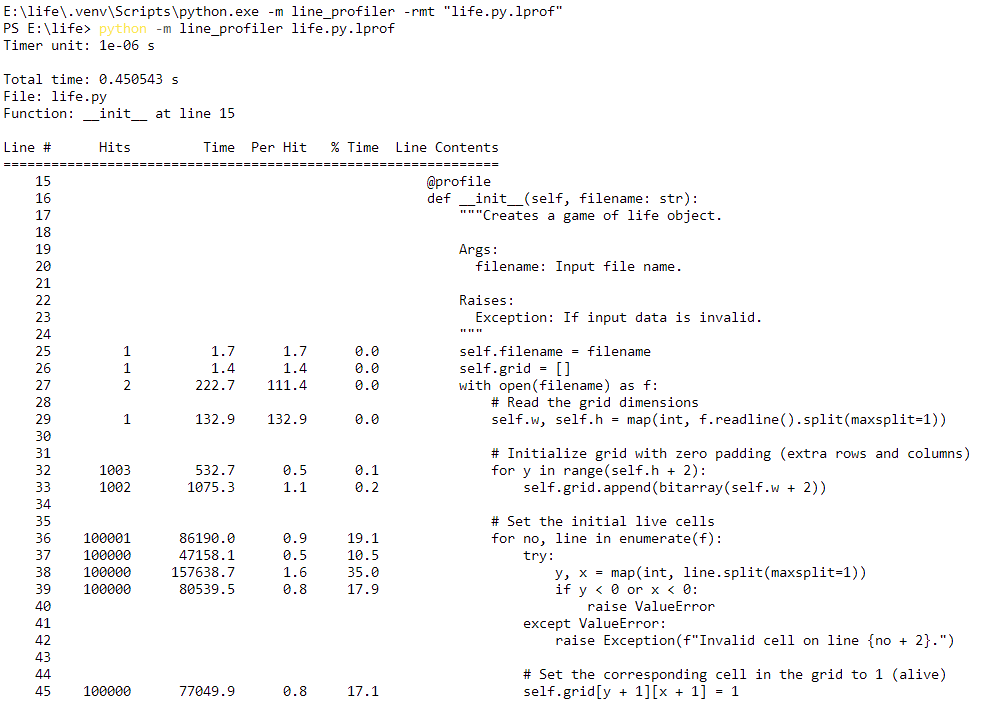
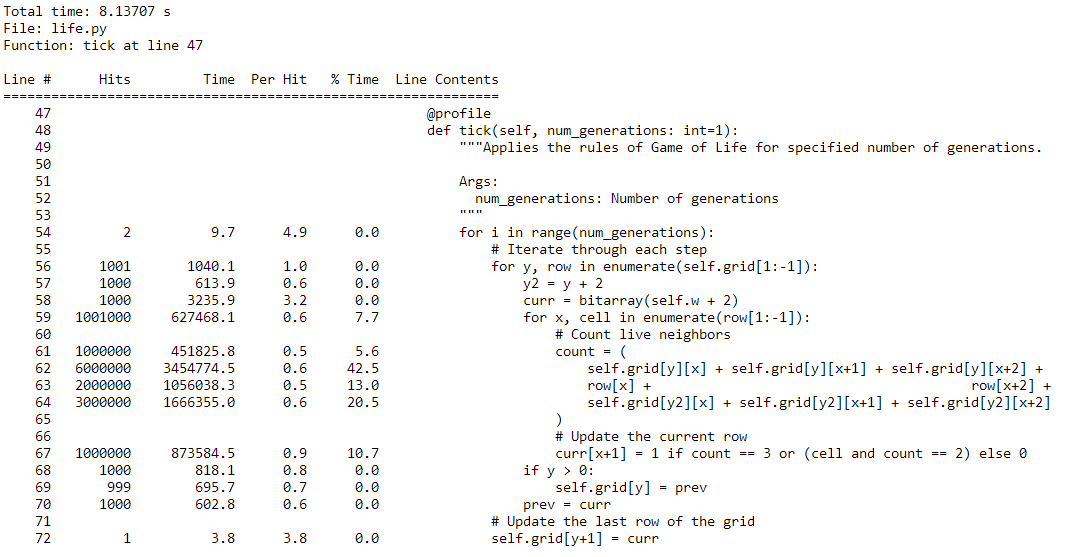

While this is the line profiler result from the last code we have developed recently with only live cells (set based) 

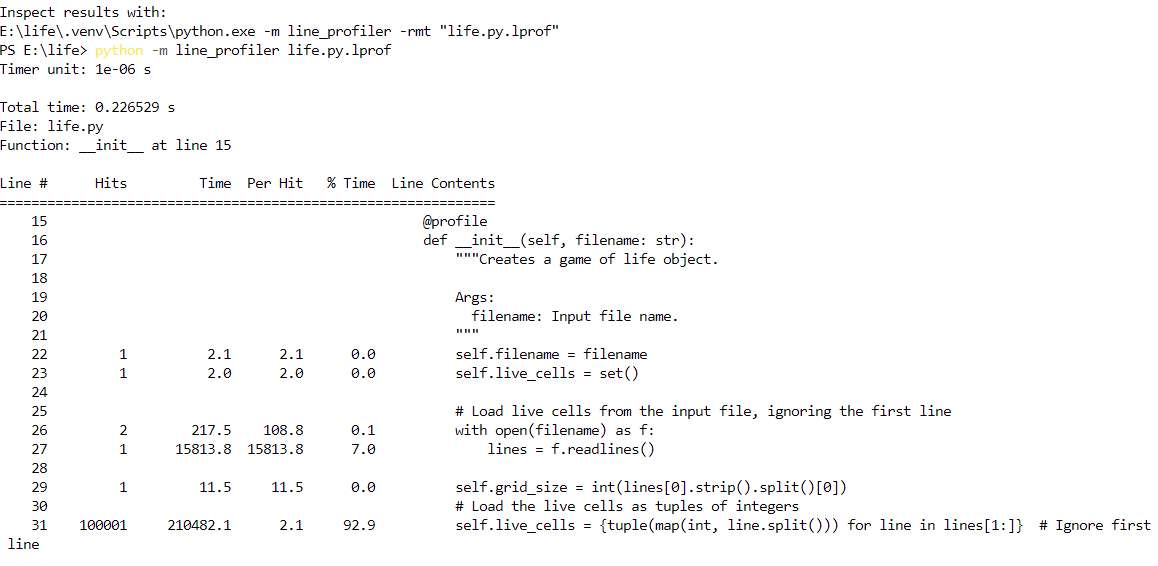
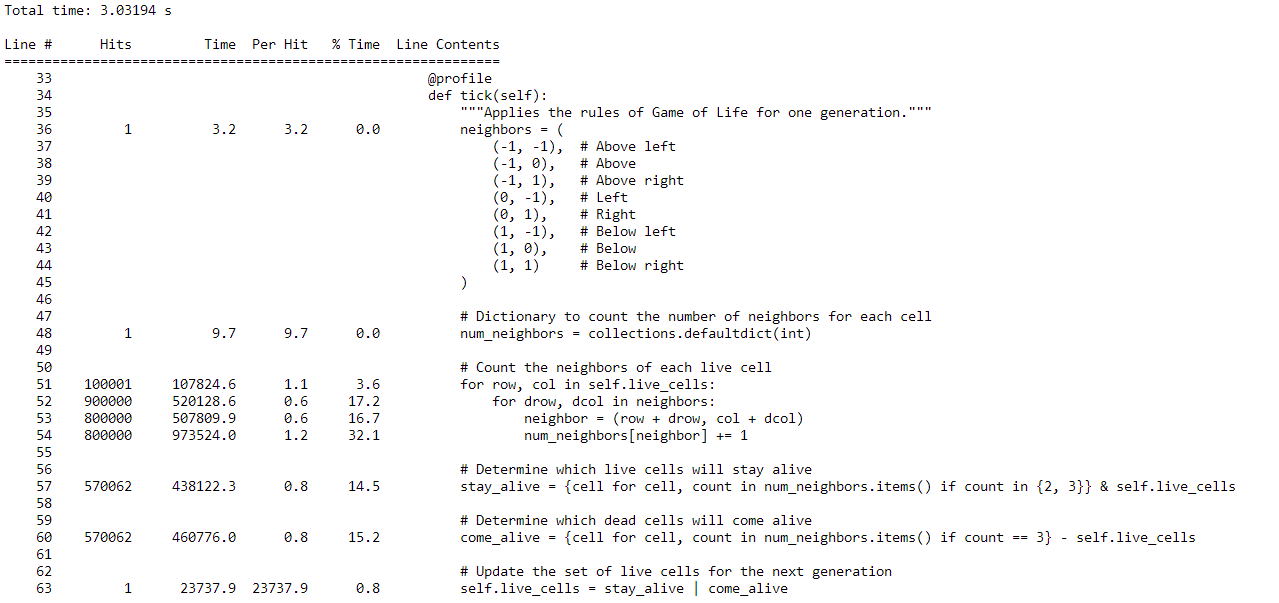

The two versions of the Game of Life code show clear differences in performance. The bitarray version is slower, especially when it comes to updating the grid during each tick. This is because it processes every cell in the grid, even if the cell is dead, which takes more time and memory. On the other hand, the set-based version (the latest developed code) is much faster because it only focuses on live cells and their neighbors. This makes it a lot more efficient, especially when the grid has fewer live cells.

During initialization, the bitarray version takes more time since it creates the entire grid, while the set-based version only stores live cells, which speeds things up. Overall, the set-based approach is better for grids where most cells are dead because it uses less memory and runs faster. The bitarray version might be more useful if the grid is densely populated, but for most cases, the set-based version is more efficient.

## Memory Profiler

Memory profiling is essential for understanding how efficiently a program utilizes memory, especially in simulations like the Game of Life, where large grids can quickly become computationally expensive. In this analysis, we compare two approaches to implementing the Game of Life: the bitarray-based and set-based versions.

The bitarray implementation uses a full 2D grid where each cell, whether alive or dead, is represented in memory. This approach simplifies handling the grid but can lead to excessive memory usage, particularly when the grid is sparsely populated with live cells.

In contrast, the set-based implementation only tracks the live cells by storing their coordinates in a set. This method reduces memory consumption by avoiding allocating memory for dead cells, making it more suitable for simulations with large, sparse grids.

By profiling both implementations, we aim to highlight the differences in memory efficiency, particularly for large grids, and demonstrate the trade-offs between these two approaches. Understanding these differences can help select the right method for different types of simulations, depending on the grid density and memory constraints.

This is the memory profiler result from bitarray code. 
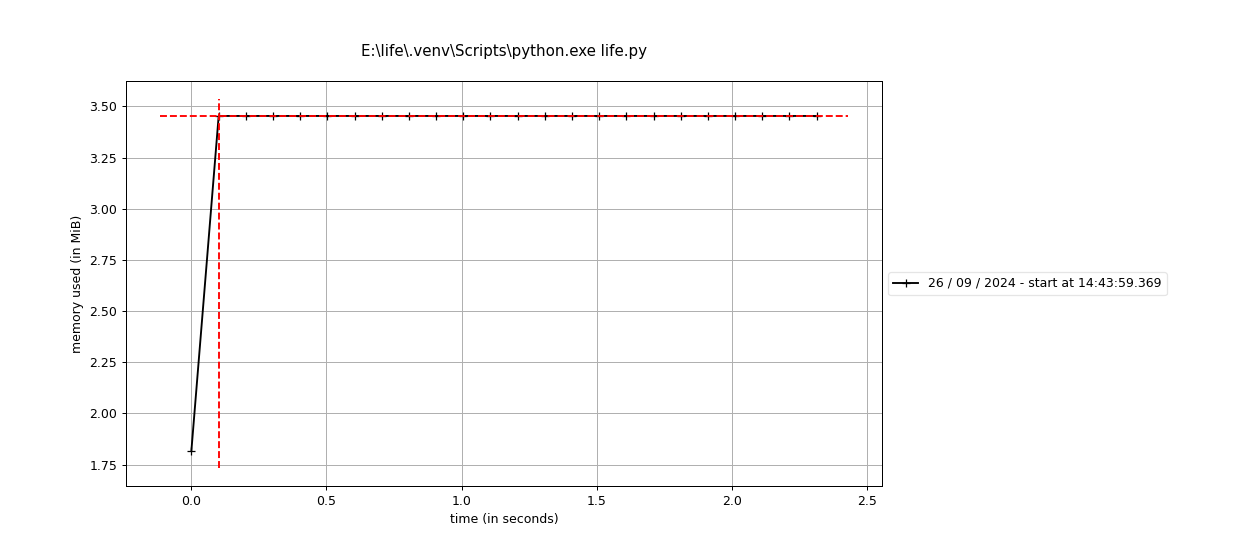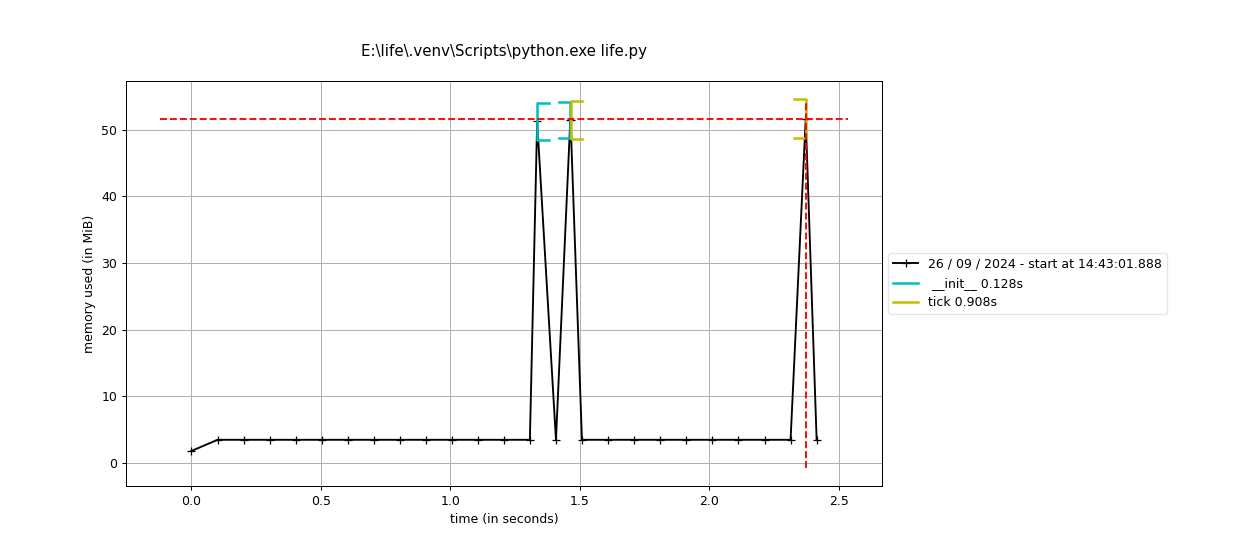

This is the memory_profiler result from set-based code. 

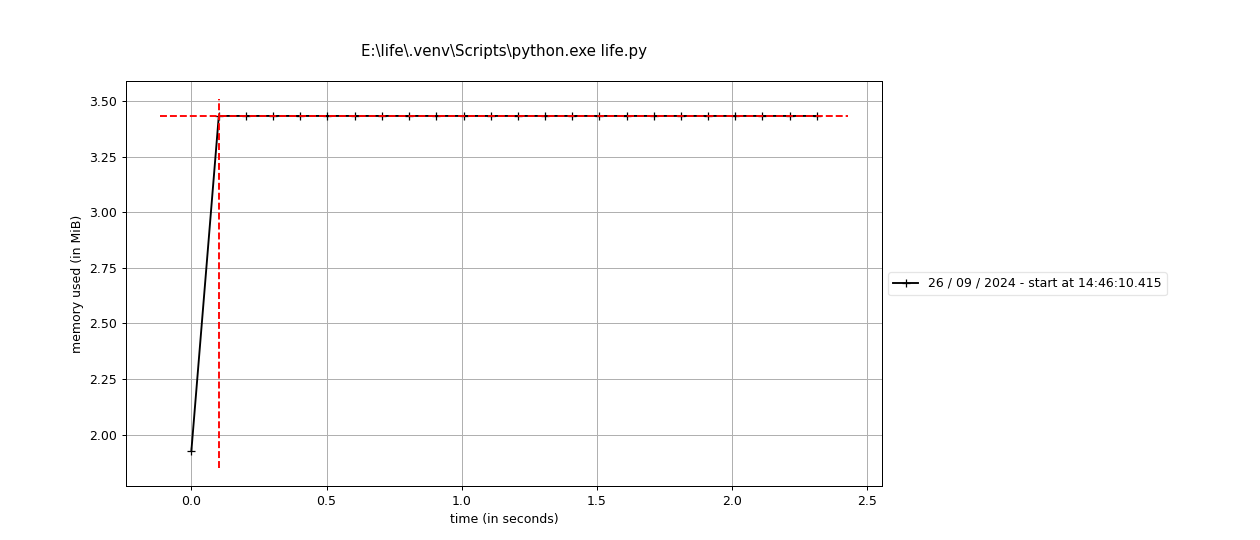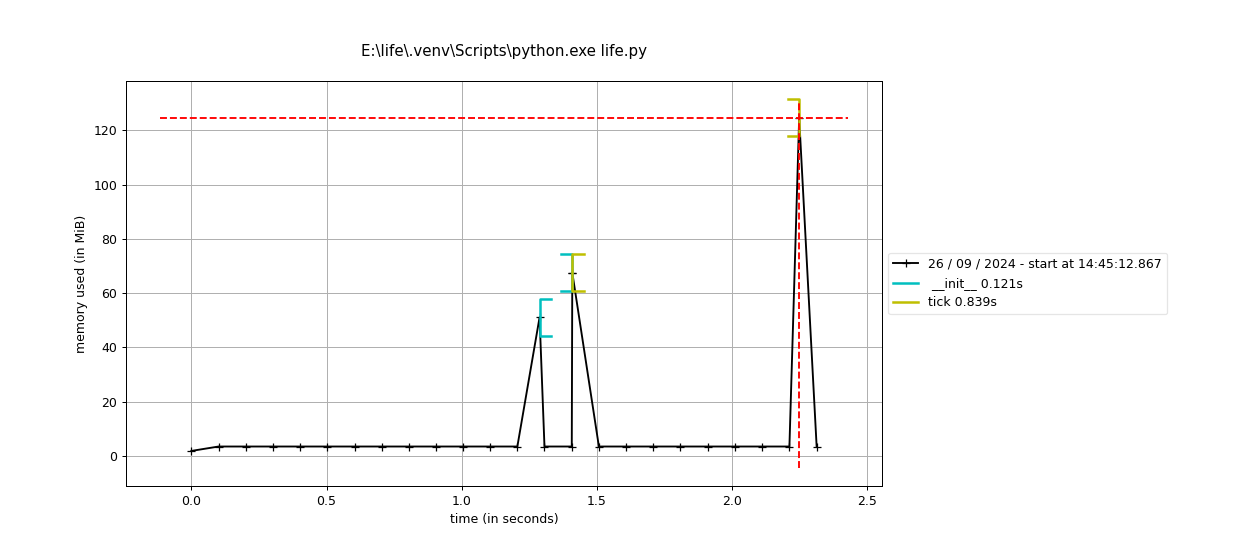

In the bitarray version, the memory usage jumps up quickly to around 3.5 MB and stays stable throughout the program. This happens because it creates a full grid, even for dead cells, which takes up more memory from the start. It’s efficient for grids that have a lot of live cells but wastes memory when most of the grid is empty.

On the other hand, the set-based version uses memory more efficiently. It only stores live cells, so it starts with much lower memory usage. It can be seen that the small spikes in memory during the simulation because it’s adding and removing cells dynamically, but overall, it uses much less memory compared to the bitarray version.

In short, the set-based version is better for grids where most of the cells are dead, while the bitarray version works fine if the grid is mostly full of live cells. The set-based approach is more flexible and saves memory, especially for large, mostly empty grids.